# Analyze Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
# from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# Load the dataset from the data directory
file_path = "../data/Credit Card Defaulter Prediction.csv"  # Adjust path based on your file name
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [3]:
# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Check data types and missing values
df.info()  
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Handle missing values

In [4]:
# Check missing values
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [5]:
# if there were missing values
# For numerical features (BILL_AMT, PAY_AMT), replace missing values with the median:
# df.fillna(df.median(), inplace=True)

# For categorical features (SEX, EDUCATION, MARRIAGE), replace missing values with the mode:
# df.fillna(df.mode().iloc[0], inplace=True)

## Standardize Categorical Variables

In [6]:
df['SEX'] = df['SEX'].map({'M': 1, 'F': 0})  # 1 = Male, 0 = Female

df['MARRIAGE'] = df['MARRIAGE'].map({'Married': 1, 'Single': 2, 'Others': 3})

df['EDUCATION'] = df['EDUCATION'].map({
    'Graduate School': 1,
    'University': 2,
    'High School': 3,
    'Others': 4
})

## Duplicate Check

In [7]:
df.duplicated().sum()

37

In [8]:
# Duplicate removal
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
important_features = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
]

df = df[important_features]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,2.0,1.0,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,2.0,2.0,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,2.0,2.0,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,2.0,1.0,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2.0,1.0,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


## Outliers Check

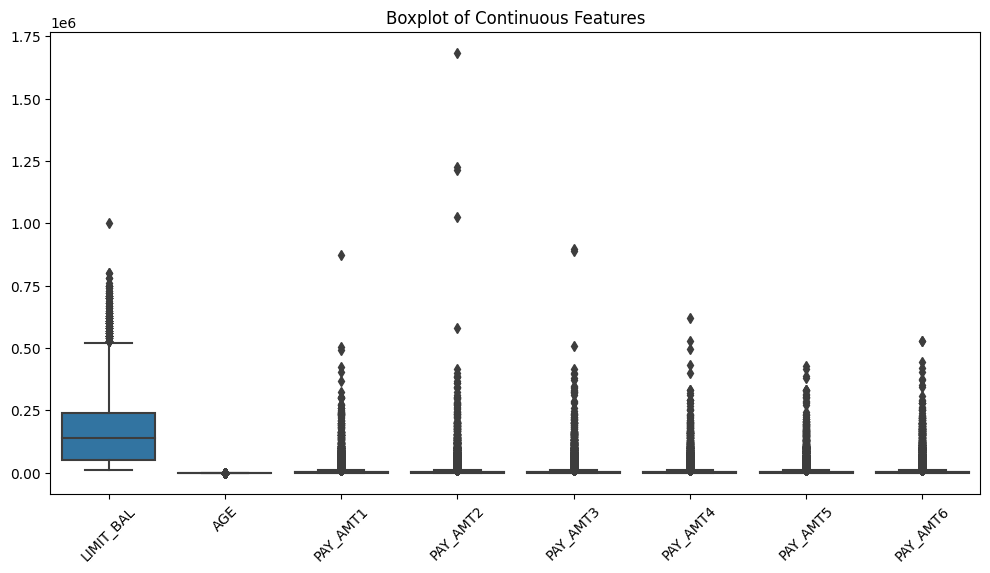

In [10]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
plt.xticks(rotation=45)
plt.title("Boxplot of Continuous Features")
plt.show()

In [11]:
# Capping extreme outliers
df = df[df['AGE'] < 100]  # Remove unrealistic ages
df['PAY_AMT1'] = df['PAY_AMT1'].clip(upper=df['PAY_AMT1'].quantile(0.99))  # Cap payments at 99th percentile

# Understanding Dataset Structure

In [12]:
df.shape

(29963, 23)

In [13]:
df.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [14]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29963.000000,29963.000000,19057.000000,29586.000000,29963.000000,29963.000000,29963.000000,29963.000000,29963.000000,29963.000000,...,2.996300e+04,29963.000000,29963.000000,29963.000000,29963.000000,2.996300e+04,29963.000000,29963.000000,29963.000000,29963.000000
mean,167448.509161,0.396255,2.270819,1.538870,35.488436,-0.016821,-0.131729,-0.164269,-0.218803,-0.264393,...,4.707106e+04,43316.221006,40361.028268,38919.609952,5039.076795,5.928379e+03,5232.038047,4831.939959,4805.217769,5221.846544
std,129761.920791,0.489127,0.458689,0.498495,9.219568,1.123499,1.196264,1.195823,1.168124,1.132169,...,6.937260e+04,64354.689164,60818.266501,59575.287501,9457.278351,2.305418e+04,17616.897214,15674.937964,15286.832072,17787.519345
min,10000.000000,0.000000,2.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,2.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.714000e+03,2360.000000,1790.500000,1265.000000,1000.000000,8.500000e+02,390.000000,300.000000,264.000000,132.500000
50%,140000.000000,0.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.014100e+04,19081.000000,18131.000000,17126.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,1.000000,3.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.020550e+04,54601.500000,50247.500000,49255.500000,5008.000000,5.000000e+03,4513.500000,4016.000000,4045.500000,4000.000000
max,1000000.000000,1.000000,4.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,66861.840000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


### Export Clean Data to CSV

In [15]:
import os

# Keep relevant columns for Excel analysis
columns_to_export = df[[
    "LIMIT_BAL", "AGE", "SEX", "EDUCATION", "MARRIAGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]]


# Save to a new csv file
file_path = "../data/cleaned_loan_data.csv"

if not os.path.exists(file_path):
    columns_to_export.to_csv(file_path, index=False)

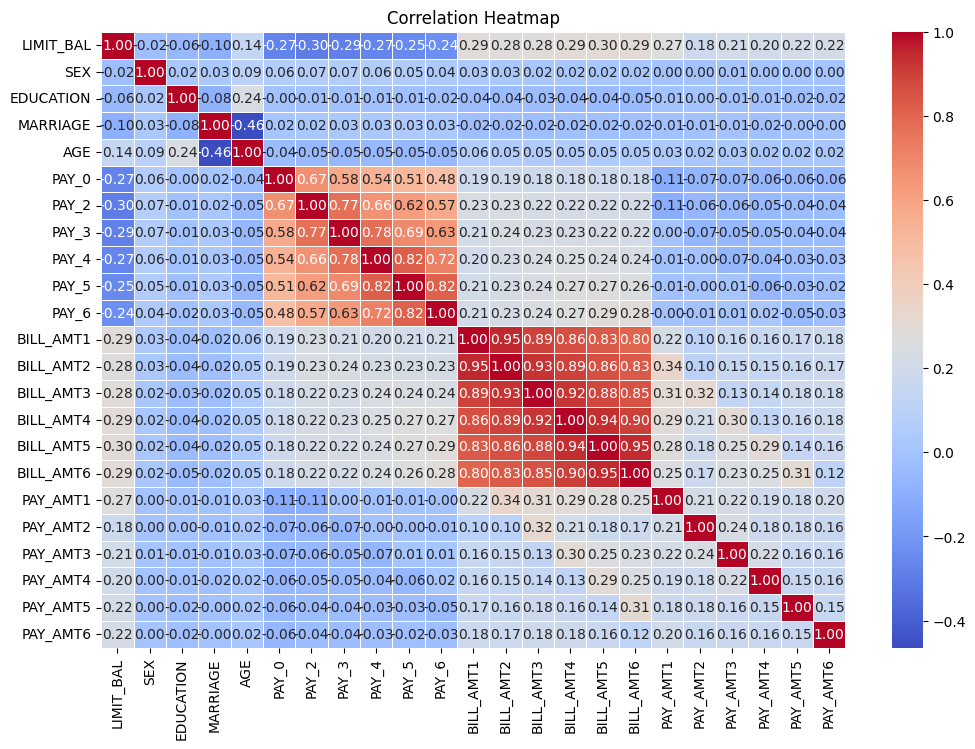

In [16]:
# Visualize Correlation Between Features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Distribution of Credit Limits (LIMIT_BAL)

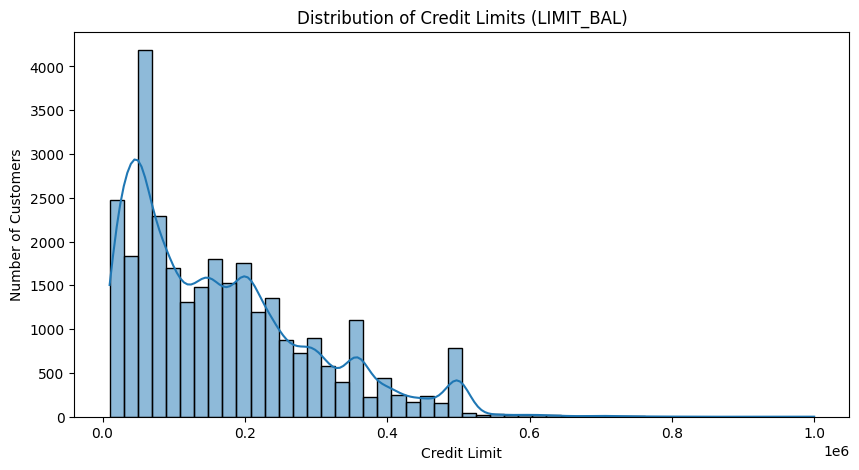

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['LIMIT_BAL'], bins=50, kde=True)
plt.title("Distribution of Credit Limits (LIMIT_BAL)")
plt.xlabel("Credit Limit")
plt.ylabel("Number of Customers")
plt.show()

### Payment Behavior Over Time (PAY_0 to PAY_6)

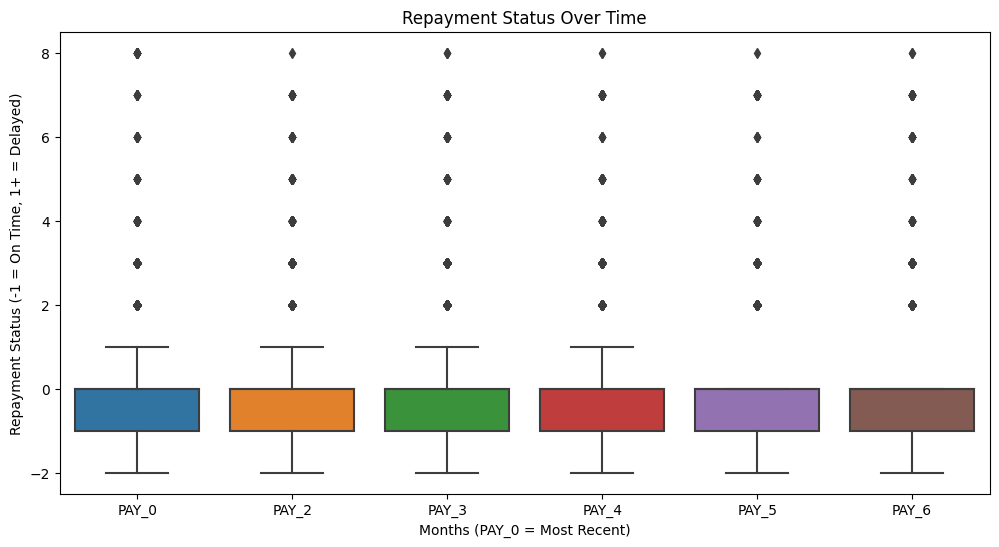

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
plt.title("Repayment Status Over Time")
plt.xlabel("Months (PAY_0 = Most Recent)")
plt.ylabel("Repayment Status (-1 = On Time, 1+ = Delayed)")
plt.show()

## Feature Data Transformation

In [19]:
# Create a "Maximum Delay" Feature
'''If a customer has delayed payments for multiple months, we can create a single max delay score'''

df["Max_Delay"] = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].max(axis=1)

In [20]:
# Create a Debt Utilization Ratio Feature
'''Meausre how much of the credit limit a customer is using'''

df["Debt_Utilization"] = df["BILL_AMT1"] / df["LIMIT_BAL"]

In [21]:
# Create a average payment ratio
'''A ratio of previous payments vs. billed amounts to identify those who only pay minimums.'''

df["Avg_Payment_Ratio"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1) / df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis=1)
df["Avg_Payment_Ratio"].fillna(df["Avg_Payment_Ratio"].median(), inplace=True)

In [22]:
# Create a High Risk Flag 
'''Mark customers as high risk if they had 3 or more months of delayed payments.'''

df["High_Risk"] = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].apply(lambda x: sum(x >= 2) >= 3, axis=1).astype(int)

## Train Model

In [23]:
# Train-Test Split

X = df[["LIMIT_BAL", "AGE", "Max_Delay", "Debt_Utilization", "Avg_Payment_Ratio"]]  # Select meaningful features
y = df["High_Risk"]  # Predicting if a customer is high risk

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
'''Issues with X values containing infinity values or a value too large for dtype'''
# if infinity values replace
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# fill values with median
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [25]:
# Train a logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5336
           1       0.51      0.43      0.47       657

    accuracy                           0.89      5993
   macro avg       0.72      0.69      0.70      5993
weighted avg       0.88      0.89      0.89      5993



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# importance feature check

feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print(feature_importance)

Max_Delay            1.475494
LIMIT_BAL           -0.000006
Avg_Payment_Ratio   -0.016201
Debt_Utilization    -0.031517
AGE                 -0.083905
dtype: float64


## Model Optimization Exploration

In [27]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Different solvers to try
}

# Initialize Logistic Regression
log_model = LogisticRegression(max_iter=1000)

# Perform Grid Search
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Logistic Regression Parameters:", grid_search.best_params_)

# Train the best model
best_log_model = grid_search.best_estimator_

Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'lbfgs'}


### Random Forest Classifier

In [28]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5336
           1       0.67      0.54      0.60       657

    accuracy                           0.92      5993
   macro avg       0.81      0.75      0.78      5993
weighted avg       0.91      0.92      0.92      5993



In [29]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Train best model
best_rf_model = grid_search_rf.best_estimator_

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


### Train Logistic Regression using SMOTE

In [30]:
# Introducing SMOTE for more cohesive sampling
# Oversampling (SMOTE) or Undersampling to balance Class 1
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [31]:
# Adjust Class Weights in Logistic Regression
log_model = LogisticRegression(class_weight='balanced', C=0.001, solver='lbfgs', max_iter=1000)
log_model.fit(X_train_bal, y_train_bal)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000)

Logistic regression model using the 'lbfgs' solver did not converge, meaning it reached the maximum number of iterations without finding an optimal solution. 

Since the default max_iter is 100, increasing this value to 1000 allowed the optimizer to find a better solution.

In [32]:
# Predictions on test set (not SMOTEd)
y_pred = log_model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5336
           1       0.41      1.00      0.58       657

    accuracy                           0.84      5993
   macro avg       0.70      0.91      0.74      5993
weighted avg       0.93      0.84      0.87      5993



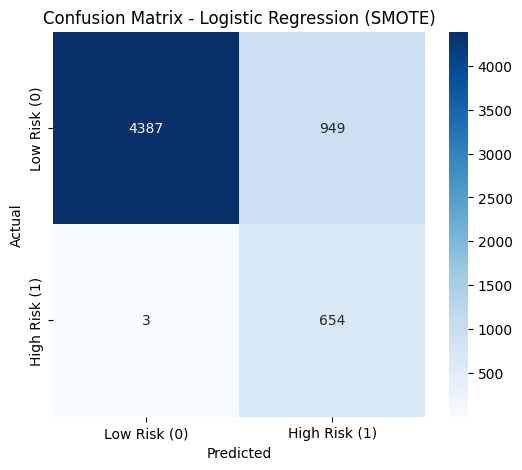

In [33]:
# LogisticRegression confusion matrix
cm = confusion_matrix(y_test, log_model.predict(X_test))

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk (0)", "High Risk (1)"], yticklabels=["Low Risk (0)", "High Risk (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.show()

### Train Random Forest using SMOTE

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5336
           1       0.52      0.81      0.63       657

    accuracy                           0.90      5993
   macro avg       0.75      0.86      0.79      5993
weighted avg       0.92      0.90      0.91      5993



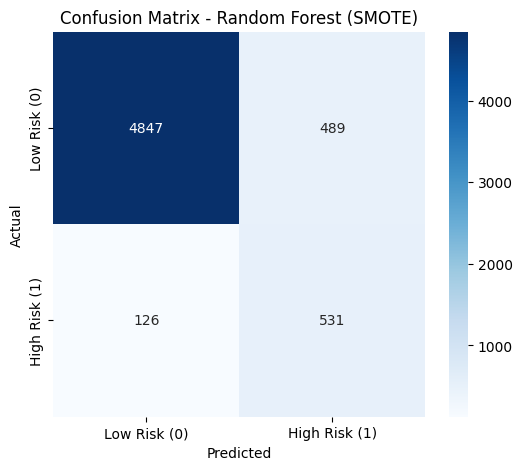

In [35]:
# RandomForest confusion matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk (0)", "High Risk (1)"], yticklabels=["Low Risk (0)", "High Risk (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (SMOTE)")
plt.show()

- If many false negatives remain (bottom-left box is high), recall needs further improvement.
- If false positives are high (top-right box), precision needs improvement.

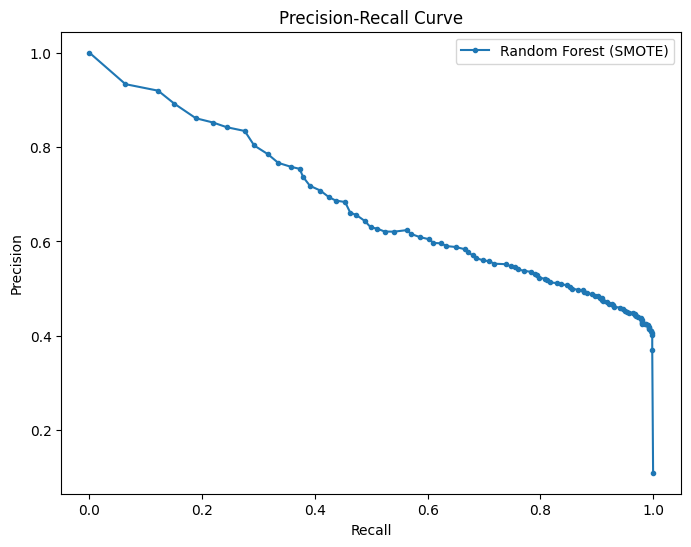

In [36]:
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for Class 1
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label="Random Forest (SMOTE)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

- If the curve stays closer to (1,1), the model is strong at predicting defaults.
- Precision is still low (~0.52), meaning some false positives exist.

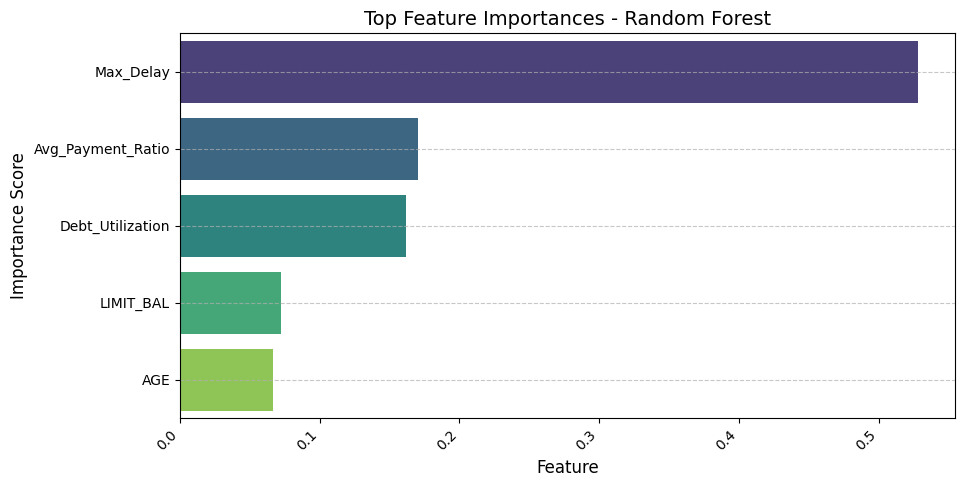

In [37]:
# Feature Importance (Top Risk Indicators)
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)

# Set color palette
colors = sns.color_palette("viridis", len(feature_importance[:10]))  # Using seaborn's Husl palette for variety

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance[:10].values, y=feature_importance[:10].index, palette=colors)

# Customizing plot
plt.title("Top Feature Importances - Random Forest", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

- PAY_0, Debt_Utilization, and Max_Delay should be highly important.
- Helps explain risk drivers to stakeholders.

### Model Comparison

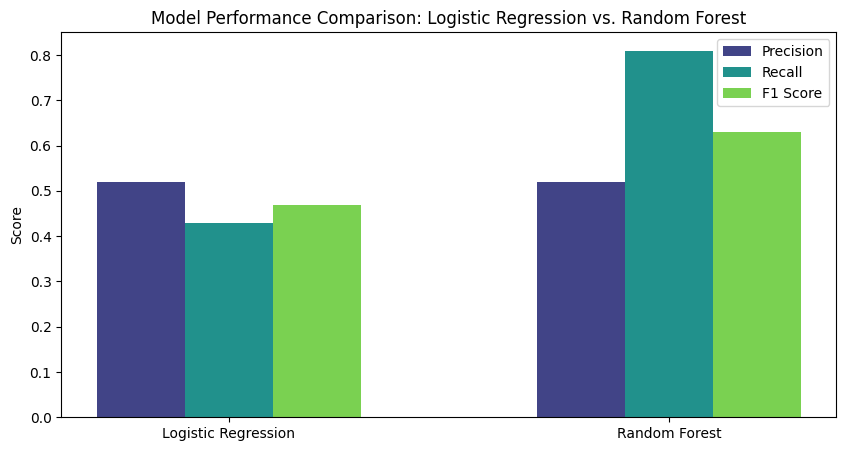

In [38]:
# Define model names and scores
models = ["Logistic Regression", "Random Forest"]
recall_scores = [0.43, 0.81]
precision_scores = [0.52, 0.52]
f1_scores = [0.47, 0.63]

# Generate Viridis colors
cmap = plt.get_cmap("viridis")
precision_color = cmap(0.2)  # Darker shade
recall_color = cmap(0.5)     # Mid-range shade
f1_color = cmap(0.8)         # Brighter shade

# Plot settings
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 5))
plt.bar(x - width, precision_scores, width, label="Precision", color=precision_color)
plt.bar(x, recall_scores, width, label="Recall", color=recall_color)
plt.bar(x + width, f1_scores, width, label="F1 Score", color=f1_color)

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison: Logistic Regression vs. Random Forest")
plt.legend()
plt.show()

- Random Forest outperforms Logistic Regression significantly in recall (81% vs. 43%).
- Both models struggle with precision (52%), meaning some false positives remain.
- If recall is a priority (for minimizing financial risk), Random Forest is the better model.

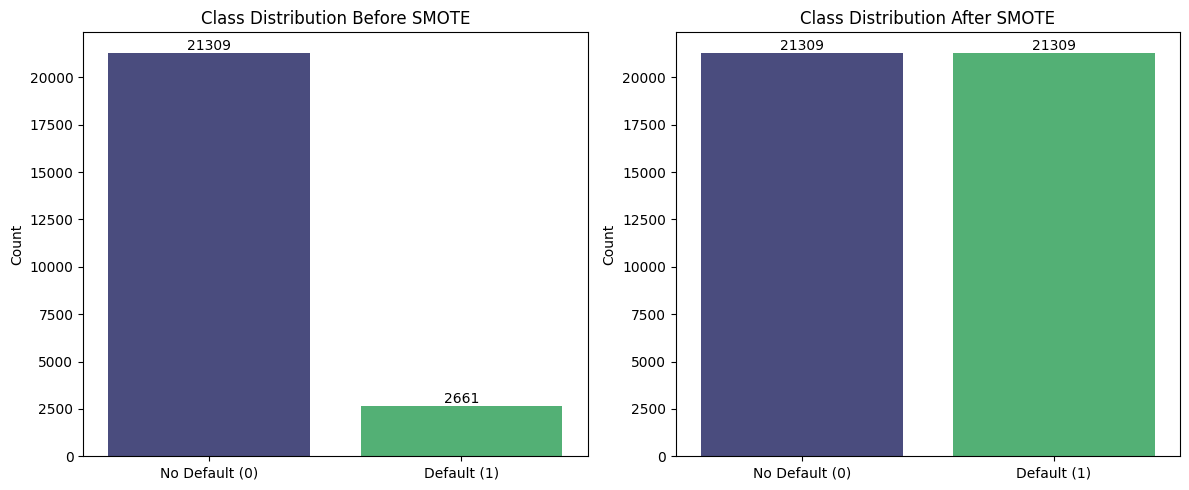

In [39]:
from collections import Counter

# Define Viridis colors from the colormap
viridis_colors = sns.color_palette("viridis", as_cmap=True)
class_labels = ['No Default (0)', 'Default (1)']

# Original class distribution
class_counts_before = Counter(y_train)  

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  
class_counts_after = Counter(y_train_bal)  

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Get two colors from Viridis colormap
cmap = plt.get_cmap("viridis")
colors = [cmap(0.2), cmap(0.7)]  # Adjust values to select appropriate shades

# Plot before SMOTE
sns.barplot(x=list(class_counts_before.keys()), y=list(class_counts_before.values()), ax=axes[0], palette=colors)
axes[0].set_title("Class Distribution Before SMOTE", fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(class_labels)
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

# Plot after SMOTE
sns.barplot(x=list(class_counts_after.keys()), y=list(class_counts_after.values()), ax=axes[1], palette=colors)
axes[1].set_title("Class Distribution After SMOTE", fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(class_labels)
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

# Display plots
plt.tight_layout()
plt.show()

### ROC Curve Comparison

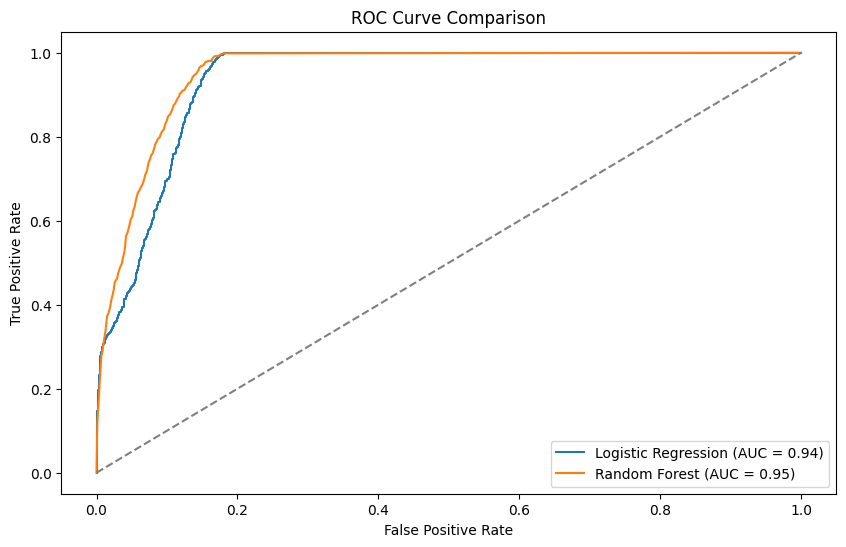

In [40]:
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.show()
    
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model
}

plot_roc_curve(models, X_test, y_test)

- Both models perform extremely well in distinguishing between defaulters and non-defaulters.
- Random Forest performs slightly better (0.95 vs. 0.94), meaning it has a marginally higher ability to rank positive cases higher than negative ones.
- In real-world scenarios, this small difference may or may not be significant depending on business needs (e.g., if interpretability is crucial, logistic regression may still be preferred).

### Export Model Predictions

In [43]:
# Ensure X_test is a DataFrame 
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Create a DataFrame with Actual Labels and Predictions
test_data = X_test_df.copy()
test_data["Actual"] = y_test.values  # Convert to array if needed
test_data["Predicted_RF"] = rf_model.predict(X_test)
test_data["Predicted_LR"] = log_model.predict(X_test)

# Export to CSV
# Save to a new csv file
file_path = "../data/model_predictions.csv"

if not os.path.exists(file_path):
    test_data.to_csv(file_path, index=False)

###  Export Feature Importance Data

In [ ]:
# Feature importance helps to visualize factors that affect loan defaults the most.
feature_importance = pd.DataFrame({
    "Feature": X_train_bal.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)



if not os.path.exists(file_path):
    feature_importance.to_csv(file_path, index=False)

### Export Model Performance Metrics

In [47]:
# visualize precision, recall, and accuracy in Tableau

performance_data = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Precision": [0.93, 0.97],
    "Recall": [0.95, 0.91],
    "F1-Score": [0.94, 0.94],
    "Accuracy": [0.89, 0.90]
})

file_path = "../data/model_performance.csv"

if not os.path.exists(file_path):
    performance_data.to_csv(file_path, index=False)